#### Model Compilation

In [1]:
import amici

sbml_file = '/SBML/PyPESTO/FRP/sbml_model.xml'
sbml_importer = amici.SbmlImporter(sbml_file)

In [2]:
model_name = 'FRP'
model_output_dir = 'tmp/' + model_name
sbml_importer.sbml2amici(model_name, model_output_dir, verbose=False)

#### Loading the model module

In [3]:
# Load the model module
model_module = amici.import_model_module(model_name, model_output_dir)

# Instantiate model
model = model_module.getModel()

# Instantiate solver
solver = model.getSolver()

In [4]:
print("Model parameters: ", list(model.getParameterIds()))
print("Model observables:", list(model.getObservableIds()))
print("Model states:     ", list(model.getStateIds()))

Model parameters:  ['kd', 'f', 'kpAA', 'kpAB', 'kpBA', 'kpBB']
Model observables: ['yI', 'yR', 'yA', 'yB', 'yRA', 'yRB', 'yPAA', 'yPAB', 'yPBA', 'yPBB', 'yfPAA', 'yfPAB', 'yfPBA', 'yfPBB', 'yPA', 'yPB', 'yc']
Model states:      ['I', 'R', 'A', 'B', 'RA', 'RB', 'PAA', 'PAB', 'PBA', 'PBB']


In [5]:
model.setParameterByName('kd', 1e10)
model.setParameterByName('kpAA', 2.0)
model.setParameterByName('kpAB', 0.5)
model.setParameterByName('kpBA', 10.0)
model.setParameterByName('kpBB', 0.1)
print(model.getParameters())

model.setInitialStates([5e-3, 0, 2.1, 0.9, 0, 0, 0, 0, 0, 0])

(10000000000.0, 0.5, 2.0, 0.5, 10.0, 0.1)


In [6]:
solver.setAbsoluteTolerance(1e-10)

#### Running Model Simulations

In [7]:
import numpy as np
timepoints = np.linspace(0, 100, 10)
model.setTimepoints(timepoints)
rdata = amici.runAmiciSimulation(model, solver)

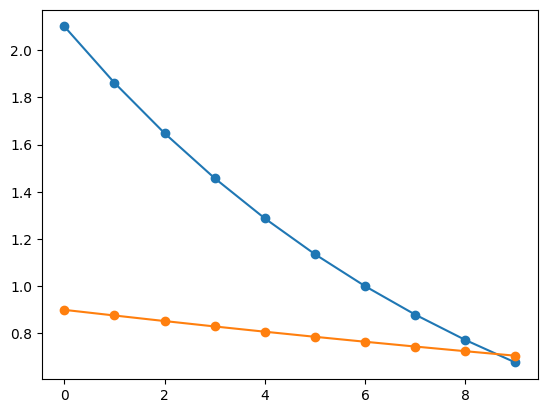

In [14]:
import matplotlib.pyplot as plt

plt.plot(rdata.by_id('A'), 'o-')
plt.plot(rdata.by_id('B'), 'o-')

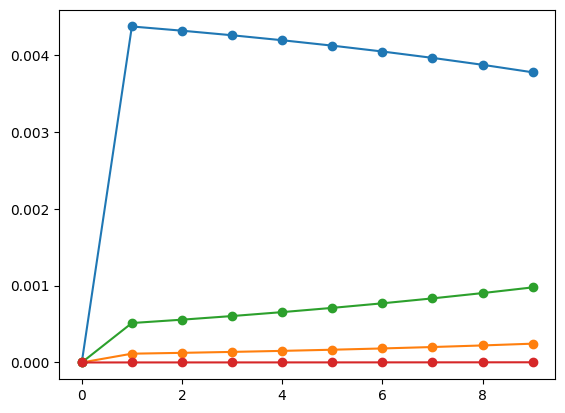

In [15]:
plt.plot(rdata.by_id('PAA'), 'o-')
plt.plot(rdata.by_id('PAB'), 'o-')
plt.plot(rdata.by_id('PBA'), 'o-')
plt.plot(rdata.by_id('PBB'), 'o-')

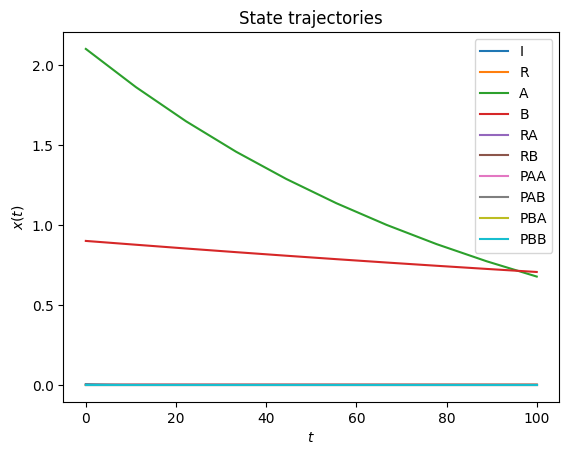

In [16]:
import amici.plotting
amici.plotting.plot_state_trajectories(rdata, model=None)

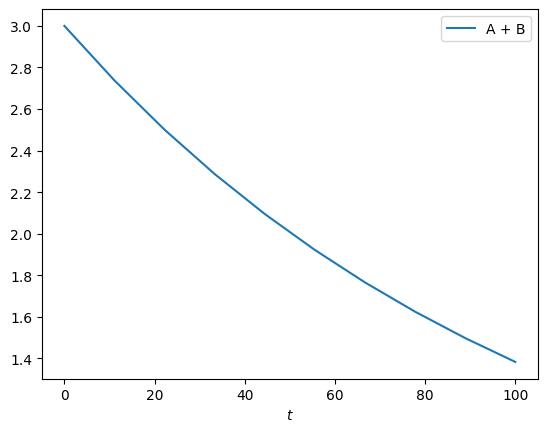

In [17]:
amici.plotting.plot_expressions(
    "A + B", rdata=rdata
)

In [18]:
for key, value in rdata.items():
    print("%12s: " % key, value)

          ts:  [  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
           x:  [[ 5.00000000e-003  0.00000000e+000  2.10000000e+000  9.00000000e-001
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-2.92274648e-276  6.45948877e-012  1.86127312e+000  8.76172140e-001
   4.67717133e-011  3.31062750e-014  4.37184282e-003  1.14390425e-004
   5.13228706e-004  5.37997131e-007]
 [-1.47487004e-298  2.05386260e-013  1.64781234e+000  8.52625025e-001
   1.16579132e-012 -3.45282001e-015  4.31708087e-003  1.25384593e-004
   5.56886424e-004  6.48113234e-007]
 [ 2.72420926e-299 -5.24711672e-012  1.45731771e+000  8.29753835e-001
  -2.60918787e-011  7.35547560e-015  4.25755859e-003  1.37542653e-004
   6.04116577e-004  7.82214809e-007]
 [-3.64770151e-304  1.84282162e-011  1.28736263e+000  8.07542621e-001
   6.89345152e-011  9.46490817e-013  4.19287076e-003  1.510

In [41]:
edata = amici.ExpData(rdata, 0.0001, 0.0)
rdata = amici.runAmiciSimulation(model, solver, edata)
# amici.plotting.plotObservableTrajectories(edata)

In [48]:
# plt.plot(np.array(edata.getObservedData()).reshape()